# <font color='red'>BackPropagation</font>

In [137]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


 ## <font color='red'>Gradient clipping</font>

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>

</pre></b>

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='blue'>Forward propagation </font>

In [139]:
import numpy as np
import pandas as pd
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    sigmoid = 1 / (1 + np.exp(-1*z))
    
    return sigmoid

def forward_propagation(x, y , w):

        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        
        data = {}
        f1 = x[0]
        f2 = x[1]
        f3 = x[2]
        f4 = x[3]
        f5 = x[4]
        feature_dict = {"f1" : f1 , "f2" : f2 , "f3" : f3 , "f4" : f4 , "f5" : f5}
        exp = np.exp(w[5] + (((w[0]*f1) + (w[1]*f2))**2))
        tanh = np.tanh(w[6] + exp)
        
        part_3 = (np.sin(w[2]*f3) * ((w[3]*f4) + (w[4]*f5))) + w[7]
        sig = sigmoid(part_3)
        
        y_pred = (w[8]*sig) + tanh
        
        y_pred = y_pred
        y_org = y
        error = (y_org - y_pred) 
        L = error**2
        dl = (-2 * error) 
        
        data["dl"] = dl
        data["loss"] = L
        data["exp"] = exp
        data["tanh"] = tanh
        data["sigmoid"] = sig
        
        return data , feature_dict , y_pred

<font color='cyan'>Grader function - 1</font>

In [140]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [141]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    print(data['dl'] , dl , loss , part1 , part2 , part3)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1 , feature_dict , y_pred=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

-1.9285278284819143 True True True True True


True

## <font color='blue'>Backward propagation</font>

In [142]:
def backward_propagation(L,W,dict,feature_dict):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dW = {}
    #First Part
    #------------------------------------------------------------------------------------------
    dw7 = (L)*(1 - (np.tanh(W[6] + dict["exp"]))**2)
    dw6 = dw7*dict["exp"]
    dw1 = dw6*((2*feature_dict["f1"]) * ((W[0]*feature_dict["f1"]) + (W[1]*feature_dict["f2"])))
    dw2 = dw6*((2*feature_dict["f2"]) * ((W[0]*feature_dict["f1"]) + (W[1]*feature_dict["f2"])))
    #-------------------------------------------------------------------------------------------
    
    #Second Part
    #-------------------------------------------------------------------------------------------
    dw9 = (L)*dict["sigmoid"]
    dw8 = (L)*W[8]*(dict["sigmoid"] - dict["sigmoid"]**2)
    dw3 = dw8*np.cos(W[2]*feature_dict["f3"])*feature_dict["f3"]*((W[3]*feature_dict["f4"]) + (W[4]*feature_dict["f5"]))
    dw4 = dw8*np.sin(W[2]*feature_dict["f3"])*feature_dict["f4"]
    dw5 = dw8*np.sin(W[2]*feature_dict["f3"])*feature_dict["f5"]
    #-------------------------------------------------------------------------------------------
    dW["dw1"] = dw1
    dW["dw2"] = dw2
    dW["dw3"] = dw3
    dW["dw4"] = dw4
    dW["dw5"] = dw5
    dW["dw6"] = dw6
    dW["dw7"] = dw7
    dW["dw8"] = dw8
    dW["dw9"] = dw9
    return dW

In [143]:
w=np.ones(9)*0.1
d1 , feature_dict , y_pred=forward_propagation(X[0],y[0],w)
d1 = backward_propagation(d1["dl"],w,d1,feature_dict)
print(d1)

{'dw1': -0.22973323498702003, 'dw2': -0.021407614717752925, 'dw3': -0.00562540558026632, 'dw4': -0.004657941222712424, 'dw5': -0.0010077228498574248, 'dw6': -0.6334751873437471, 'dw7': -0.561941842854033, 'dw8': -0.04806288407316517, 'dw9': -1.0181044360187037}


## <font color='blue'> Implement gradient checking</font>

In [144]:
import random
W=np.ones(9)*0.1
t = 1e-4
def gradient_checking(x,y,W):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    data , f_dict , y_pred_org = forward_propagation(x , y , W)
    grad_dict = backward_propagation(data["dl"],W,data,f_dict)
    
    approx_gradients = []
    for i in range(len(W)):
        
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
       
        
        W[i] = W[i] + t
        
        data_plus , f_dict_plus , y_pred_plus = forward_propagation(x,y,W)
        W[i] = W[i] - 2*t
        
        data_minus , f_dict_minus , y_pred_minus = forward_propagation(x,y,W)
        W[i] = W[i] + t

        approx_gradients.append((data_plus["loss"] - data_minus["loss"]) / (2*t))
        
    
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    gradient_check = []
    for org , aprox in zip(grad_dict.values() , approx_gradients):
        
        numerator = org - aprox
        denominator = org + aprox
        #print(numerator , denominator)
        check = numerator / denominator
        
        if check < 1e-7:
            gradient_check.append(True)
        else:
            gradient_check.append(False)
    return gradient_check

In [145]:
W=np.ones(9)*0.1
gradient_check = gradient_checking(X[0],y[0],W)
gradient_check

[True, True, True, True, True, True, True, True, True]

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

In [10]:
epoch = 100
mu, sigma = 0, 0.1 # mean and standard deviation
W = np.random.normal(mu, sigma, 9)

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [79]:
from tqdm import tqdm
W = np.ones(9)*0.1
learning_rate = 0.01
Loss = []
for i in tqdm(range(epoch)):
    l = []
    for x_p , y_p in zip(X , y):
        data , f_dict , y_pred = forward_propagation(x_p , y_p , W)
        grad_dict = backward_propagation(data["dl"],W,data,f_dict)
        
        grad_dict_learning = [learning_rate*i for i in list(grad_dict.values())]
        
        W = W - grad_dict_learning
        l.append(data["loss"])
    Loss.append(np.mean(l))



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.41it/s]


<font color='blue'>Plot between epochs and loss</font>

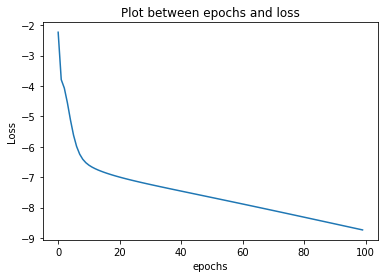

In [81]:
from matplotlib import pyplot as plt
x = range(epoch)
y = np.log(Loss)
plt.plot(x,y)
plt.title('Plot between epochs and loss')
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.show()

###<font color='blue'>Algorithm with Momentum update of weights</font>

In [110]:
mu, sigma = 0, 0.1 # mean and standard deviation
W = np.random.normal(mu, sigma, 9)
learning_rate = 0.01
Loss = []
gama = 0.9
for i in tqdm(range(epoch)):
    l = []
    for x_p , y_p in zip(X , y):
        data , f_dict , y_pred = forward_propagation(x_p , y_p , W)
        grad_dict = backward_propagation(data["dl"],W,data,f_dict)
        grad_dict_learning = [learning_rate*i for i in grad_dict.values()]
        
        
        #momentum update
        momentum = sum([gama*k for k in x_p])
        for r in grad_dict_learning:
            r = r + momentum
        
        W = W - grad_dict_learning
        
        
        l.append(data["loss"])
    Loss.append(np.mean(l))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.79it/s]


<font color='blue'>Plot between epochs and loss</font>

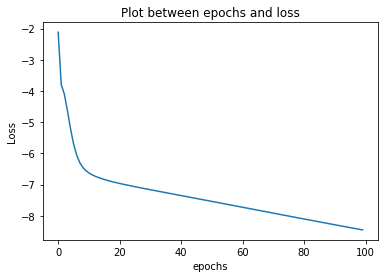

In [112]:
from matplotlib import pyplot as plt
x = range(epoch)
y = np.log(Loss)
plt.plot(x,y)
plt.title('Plot between epochs and loss')
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.show()

###<font color='blue'>Algorithm with Adam update  of weights</font>

In [146]:
from tqdm import tqdm
mu, sigma = 0, 0.1 # mean and standard deviation
W = np.random.normal(mu, sigma, 9)
learning_rate = 0.001
Loss = []
beta_1 = 0.90
beta_2 = 0.99
for i in tqdm(range(epoch)):
    l = []
    for x_p , y_p in zip(X , y):
        data , f_dict , y_pred = forward_propagation(x_p , y_p , W)
        grad_dict = backward_propagation(data["dl"],W,data,f_dict)
        
        grad_dict_learning =list(grad_dict.values())
        
        m = [(beta_1*(np.mean( grad_dict_learning)) + (1 - beta_1)*k) for k in grad_dict_learning]
        v = [(beta_2*(np.std(grad_dict_learning)) + (1 - beta_2)*(j)**2) for j in grad_dict_learning]
        
        denom1 = (1 - (beta_1)**i) 
        denom2 = (1 - (beta_2)**i)
        
        m_dash = [l / (denom1 + 1e-3) for l in m]
        v_dash = [o / (denom2 + 1e-3) for o in v ]
        
        grad_val = [learning_rate*(m_ /(np.sqrt(v_) + 1e-3)) for m_ , v_ in zip(m_dash , v_dash)]
        
        W = W - grad_val
        
        l.append(data["loss"])
    Loss.append(np.mean(l))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.25it/s]


<font color='blue'>Plot between epochs and loss</font>

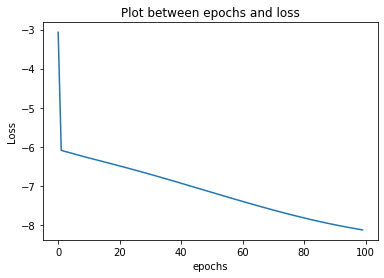

In [148]:
from matplotlib import pyplot as plt
x = range(epoch)
y = np.log(Loss)
plt.plot(x,y)
plt.title('Plot between epochs and loss')
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.show()